In [1]:
import math

def f(x):
    return (2.0*x+4.0)/(3.0*x+3.0)

def ratio(t, Na, F, k, GA, GX):
    
    if t < 0:
        t = 0
    
    Nx = Na*F/0.75 # TODO maybe change definition of F in manuscript
    wX = t/(1.5*GX*k*Nx)
    rX = k + (1.0-k)*math.exp(-wX)
    wA = t/(2.0*GA*k*Na)
    rA = k + (1.0-k)*math.exp(-wA)
    
    return F*rX/rA
    
def effective(mode, t, Na, F, k, GA, GX):
    if mode == 'X':
        Nx = Na*F/0.75 # TODO maybe change definition of F in manuscript
        w = math.exp(-t/(1.5*GX*k*Nx))
        return Nx*(k+w-w*k)
    else:
        w = math.exp(-t/(2.0*GA*k*Na))
        return Na*(k+w-w*k)


[-10000  -9950  -9900 ... 199850 199900 199950]


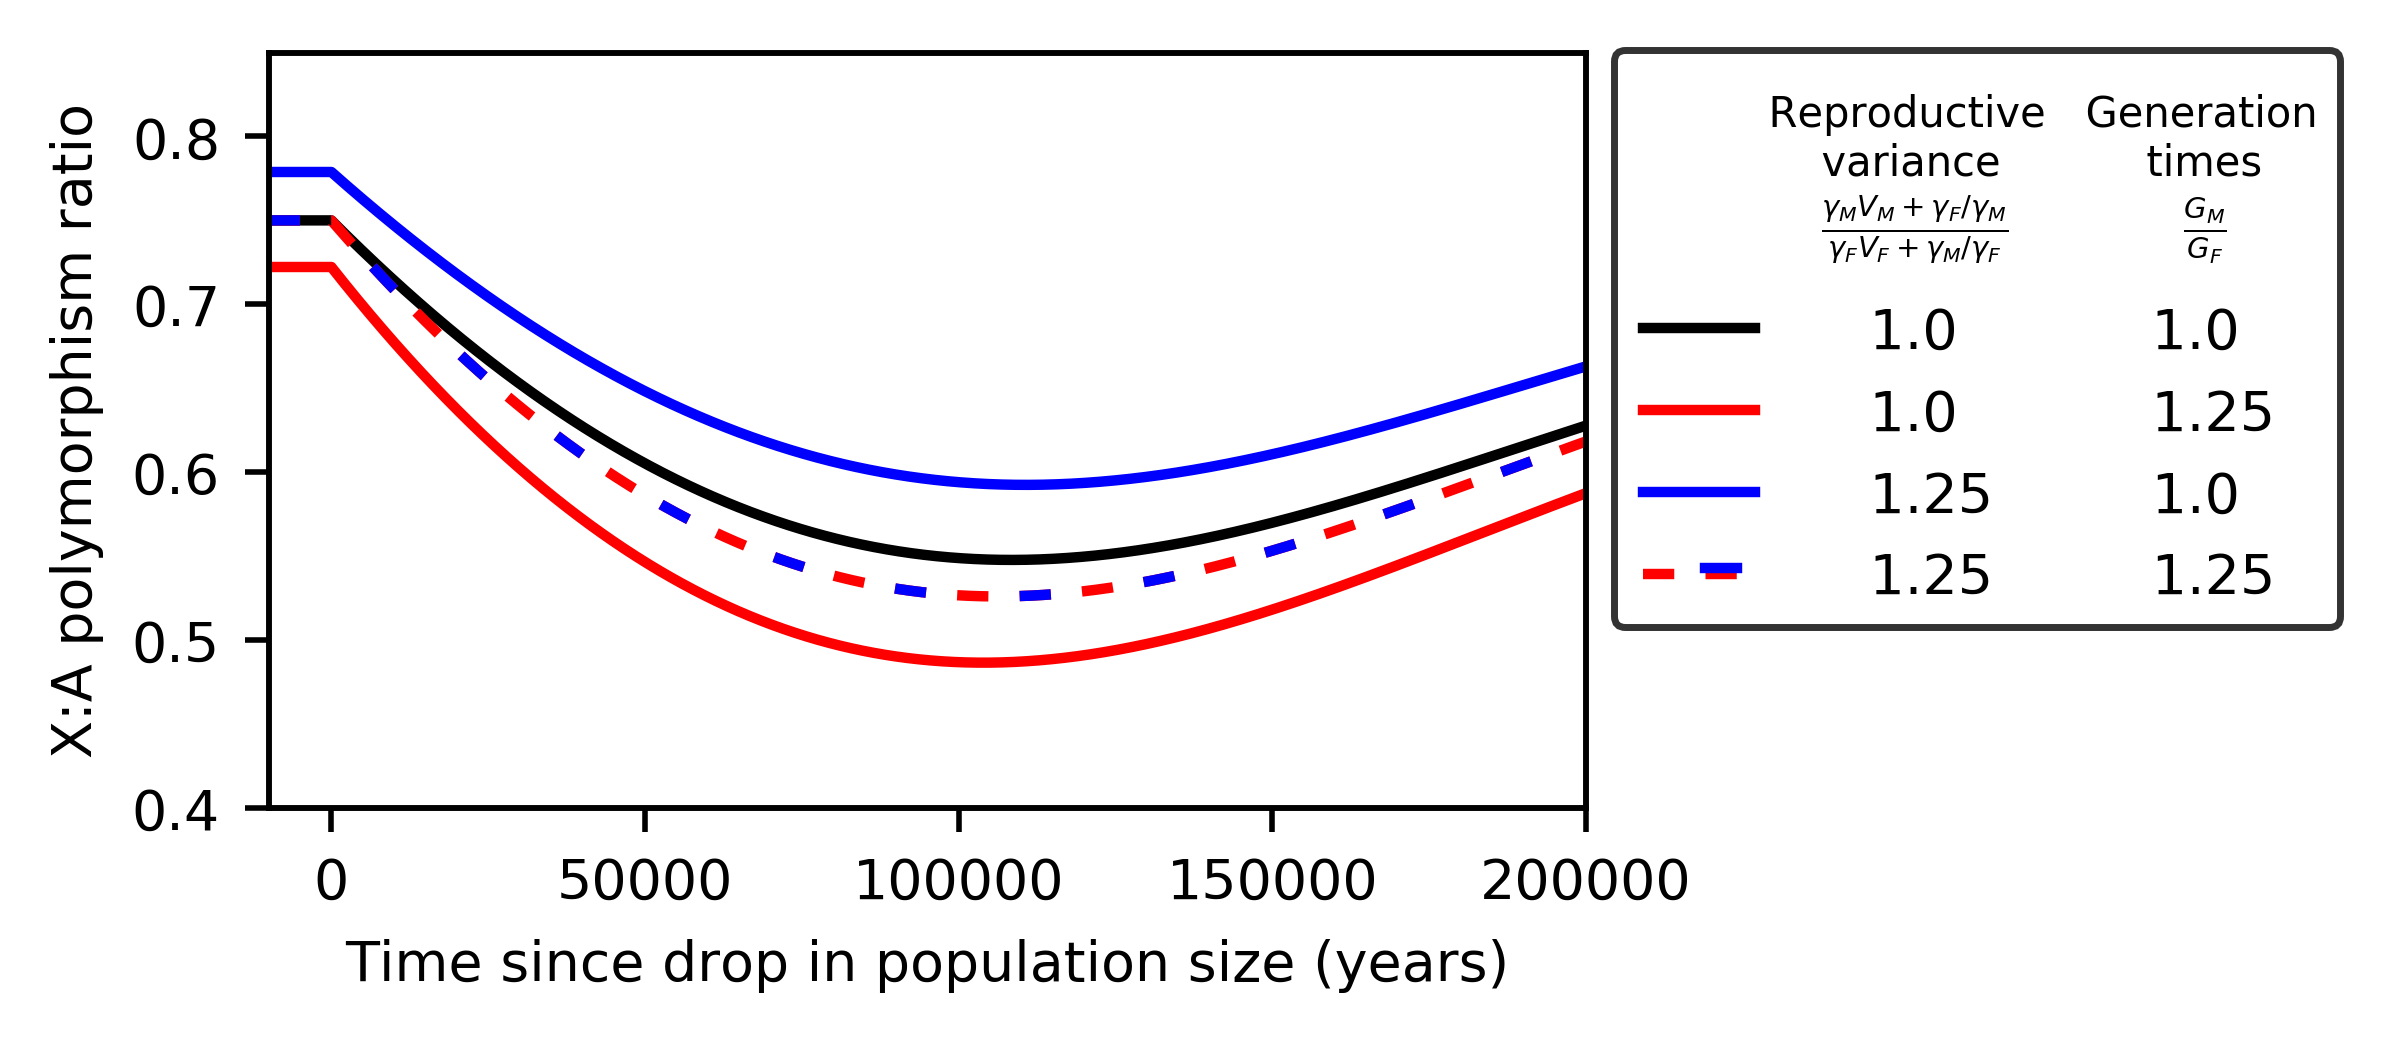

In [55]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import random
import numpy as np

# set high DPI on figures globally
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 8

plt = mpl.pyplot
lines = mpl.lines
k = 0.1

plt.figure(figsize=(3.4,2)) 
plt.subplots_adjust(hspace=.3)

ax3 = plt.subplot(111)
maxTime = 200000
ls = {1.0:{1.0:'-', 1.25:'-'},1.25:{1.0:'-', 1.25:(0,(3,3,3,3))}}
label = {1.0:'  ',1.25:''}
clr = {1.0:{1.0:'k', 1.25:'r'},1.25:{1.0:'b', 1.25:'r'}}


# ls = {1.0:{1.0:'-', 1.25:'-'},1.25:{1.0:':', 1.25:':'}}
# label = {1.0:'  ',1.25:''}
# clr = {1.0:{1.0:'k', 1.25:'r'},1.25:{1.0:'k', 1.25:'r'}}

X1 = np.arange(-10000,maxTime, step=50)
print(X1)
plt.ylabel(r"X:A polymorphism ratio")
for VR in [1.0,1.25]:
    for GR in [1.0,1.25]:
        GX = f(GR)*30.0
        F = 0.75*f(GR)/f(VR)
        plt.plot(X1, [ratio(t, 10000.0, F, k, 30.0, GX) for t in X1],
                 color=clr[VR][GR],linestyle=ls[VR][GR],
                 label='    {}'.format(VR)+label[VR]+'         {}'.format(GR)+label[VR])
        if VR == 1.25 and GR == 1.25:
                plt.plot(X1, [ratio(t, 10000.0, F, k, 30.0, GX) for t in X1],color='b',linestyle=(0,(3,9)))
plt.xlabel('Time since drop in population size (years)')
plt.ylim([0.4,0.85])
plt.xlim([-10000,maxTime])
mpl.rcParams['legend.fontsize'] = 8
#ax1.legend(loc='lower right', fontsize=7,ncol=2)
ax3.tick_params(top=False,right=False)

plt.legend(loc="upper left", bbox_to_anchor=[1, 1.04],
           ncol=1, shadow=False, title="\n          Reproductive   Generation"+
                                       "\n              variance           times\n" + 
                                       '              ' +
                                       r'$\frac{\gamma_M V_M + \gamma_F/\gamma_M}{\gamma_F V_F + \gamma_M/\gamma_F}$' +
                                       '             ' + 
                                       r'$\frac{G_M}{G_F}$',fancybox='False')
ax3.get_legend().get_title().set_color("black")       
ax3.get_legend().get_title().set_fontsize(6)
ax3.get_legend().get_frame().set_edgecolor('k')
ax4 = ax3.twinx()
ax4.tick_params(right=False,labelright=False)
ax4.hlines(0.52,color='none',xmin=25000,xmax=235000,zorder=10)

shift = 0.00047
x,y = np.array([[219000, 223000, 224000], [0.5091+shift, 0.5091+shift, 0.5091+shift]])
line = lines.Line2D(x, y,color='b')
line.set_clip_on(False)
ax4.add_line(line)

# plt.show()
plt.savefig('Theory_Fig_2.pdf', bbox_inches="tight")

In [3]:
ratio(-150, 10000.0, F, k, 30.0, GX)

0.75